In [1]:
import pickle
import sys
import os
import json
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import trimesh

sys.path.append('/root/capsule/code/beh_ephys_analysis')
from utils.beh_functions import parseSessionID
%matplotlib widget
skipping_ani_ids = ['751004','751769']

In [2]:
# Load the CCF summary CSV file
ccf_file_path = '/root/capsule/code/data_management/combined_ephys_session_ccf_summary.csv'
ccf_file_path = '/root/capsule/scratch/combined/combine_unit_tbl/combined_ephys_session_ccf_summary.pkl'
if '.csv' in ccf_file_path:
    ccf_df = pd.read_csv(ccf_file_path)
elif '.pkl' in ccf_file_path:
    with open(ccf_file_path, 'rb') as f:
        ccf_df = pickle.load(f)
        
# load the combined pickle file
combined_pickle_path = '/root/capsule/scratch/combined/combine_unit_tbl/combined_unit_tbl.pkl'
with open(combined_pickle_path, 'rb') as f:
    combined_unit_tbl = pickle.load(f)

In [30]:
ccf_df

session                  session_id  \
0    ecephys_713854_2024-03-05_12-01-40  713854_2024-03-05_12-01-40   
1    ecephys_713854_2024-03-05_13-01-09  713854_2024-03-05_13-01-09   
2    ecephys_713854_2024-03-05_13-31-20  713854_2024-03-05_13-31-20   
3    ecephys_717120_2024-03-06_12-54-27  717120_2024-03-06_12-54-27   
4    ecephys_717120_2024-03-07_12-12-02  717120_2024-03-07_12-12-02   
5    ecephys_713854_2024-03-08_15-43-01  713854_2024-03-08_15-43-01   
6    ecephys_684930_2023-09-27_10-04-04  684930_2023-09-27_10-04-04   
7    ecephys_684930_2023-09-28_11-45-27  684930_2023-09-28_11-45-27   
8    ecephys_684930_2023-09-28_12-44-15  684930_2023-09-28_12-44-15   
9    ecephys_687697_2023-09-15_11-30-06  687697_2023-09-15_11-30-06   
10   ecephys_687697_2023-09-15_12-36-06  687697_2023-09-15_12-36-06   
11   ecephys_691893_2023-10-05_12-46-57  691893_2023-10-05_12-46-57   
12   ecephys_691893_2023-10-06_13-48-18  691893_2023-10-06_13-48-18   
13  behavior_716325_2024-05-31_10-31-14  716325_2024-05-31_10-31-14   
14  behavior_717121_2024-06-15_10-00-58  717121_2024-06-15_10-00-58   
15  behavior_751004_2024-12-19_11-50-37  751004_2024-12-19_11-50-37   
16  behavior_751004_2024-12-20_13-26-11  751004_2024-12-20_13-26-11   
17  behavior_751004_2024-12-21_13-28-28  751004_2024-12-21_13-28-28   
18  behavior_751004_2024-12-22_13-09-17  751004_2024-12-22_13-09-17   
19  behavior_751004_2024-12-23_14-20-03  751004_2024-12-23_14-20-03   
20  behavior_751769_2025-01-16_11-32-05  751769_2025-01-16_11-32-05   
21  behavior_751769_2025-01-17_11-37-39  751769_2025-01-17_11-37-39   
22  behavior_751769_2025-01-18_10-15-25  751769_2025-01-18_10-15-25   
23  behavior_758017_2025-02-04_11-57-38  758017_2025-02-04_11-57-38   
24  behavior_758017_2025-02-05_11-42-34  758017_2025-02-05_11-42-34   
25  behavior_758017_2025-02-06_11-26-14  758017_2025-02-06_11-26-14   
26  behavior_758017_2025-02-07_14-11-08  758017_2025-02-07_14-11-08   
27  behavior_751766_2025-02-11_11-53-38  751766_2025-02-11_11-53-38   
28  behavior_751766_2025-02-13_11-31-21  751766_2025-02-13_11-31-21   
29  behavior_751766_2025-02-14_11-37-11  751766_2025-02-14_11-37-11   
30  behavior_751181_2025-02-25_12-12-35  751181_2025-02-25_12-12-35   
31  behavior_751181_2025-02-26_11-51-19  751181_2025-02-26_11-51-19   
32  behavior_751181_2025-02-27_11-24-47  751181_2025-02-27_11-24-47   
33  behavior_754897_2025-03-11_12-07-41  754897_2025-03-11_12-07-41   
34  behavior_754897_2025-03-12_12-23-15  754897_2025-03-12_12-23-15   
35  behavior_754897_2025-03-13_11-20-42  754897_2025-03-13_11-20-42   
36  behavior_754897_2025-03-14_11-28-53  754897_2025-03-14_11-28-53   
37  behavior_754897_2025-03-15_11-32-18  754897_2025-03-15_11-32-18   

    num_units                                              units  \
0         124  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1         157  [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...   
2         200  [0, 2, 3, 4, 5, 6, 9, 10, 12, 13, 14, 15, 16, ...   
3         142  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...   
4         114  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
5         149  [0, 1, 2, 3, 4, 5, 7, 8, 10, 12, 13, 14, 17, 1...   
6         426  [0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 1...   
7         331  [0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...   
8         331  [0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 1...   
9         210  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 19,...   
10        263  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...   
11        399  [0, 1, 2, 3, 5, 8, 9, 10, 11, 13, 14, 15, 16, ...   
12        329  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
13        281  [0, 1, 2, 3, 4, 5, 8, 9, 10, 13, 14, 16, 17, 2...   
14        243  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...   
15        267  [0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 13, 16, 17, ...   
16        248  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
17        176  [0, 2, 3, 4, 5, 6, 7, 8

Loading mesh: 20250418_transformed_remesh_10_ccf25 from /root/capsule/scratch/combined/20250418_transformed_remesh_10_ccf25.obj


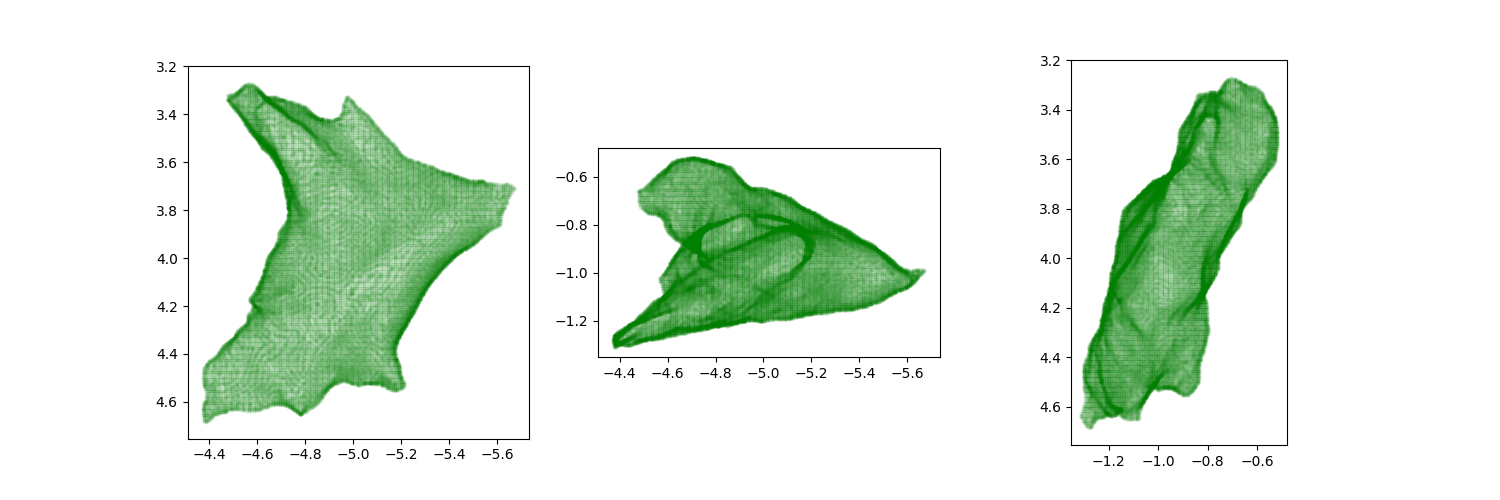

In [18]:
ml, ap, dv = 2, 0, 1
ccf_res = 25
bregma_points = np.array([216, 18, 228])  # Example bregma points in ccf space
voxel_size = 25
dot_size = 5

# --- Mesh Paths ---
mesh_files = {
    # "LC_newMesh_90_left_ccf25": f"{LC_masks_folder}/LC_newMesh_90_left_ccf25.obj",    
    "20250418_transformed_remesh_10_ccf25": "/root/capsule/scratch/combined/20250418_transformed_remesh_10_ccf25.obj",
 
}
# mesh_files.update({row["obj_filename"]: row["obj_file_path"] for row in data_list})
 
# --- Plot Setup ---
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax_titles = ['Sagittal Plane', 'Horizontal Plane', 'Coronal Plane']
plane_axes = [(0, 1), (0, 2), (2, 1)]
 
for a in ax:
    a.set_aspect('equal')
 
# --- Plot Meshes ---
for mesh_name, mesh_path in mesh_files.items():
    print(f"Loading mesh: {mesh_name} from {mesh_path}")
    mesh = trimesh.load(mesh_path)
 
    if mesh.is_empty:
        print(f"⚠️ Skipped: '{mesh_path}' is empty.")
        continue
 
    mesh_vertices = np.array(mesh.vertices)
 
 
    if mesh_name == "LC_newMesh_90_left_ccf25":
        color = 'gray'
    elif mesh_name == "20250418_transformed_remesh_10_ccf25":
        color = 'green'
   
    mesh_vertices_mm = ccf_pts_convert_to_mm(mesh_vertices, bregma_points, voxel_size)
    mesh_vertices_mm[:, 2] = -np.abs(mesh_vertices_mm[:, 2])  # Mirror ML to left
    mesh_alpha_default = 0.05
    alpha = mesh_alpha_default if 'LC' in mesh_name else 0.05
 
    for i, (x, y) in enumerate(plane_axes):
        ax[i].scatter(mesh_vertices_mm[:, x], mesh_vertices_mm[:, y],
                      color=color, s=dot_size, alpha=alpha, label=mesh_name)
        ax[i].set_aspect('equal', adjustable='box')
        if y == 1:
            ax[i].invert_yaxis()
        if x == 0:
            ax[i].invert_xaxis()

716325_2024-05-31_10-31-14
(281, 3)
717121_2024-06-15_10-00-58
(243, 3)
751004_2024-12-19_11-50-37
(267, 3)
751004_2024-12-20_13-26-11
(248, 3)
751004_2024-12-21_13-28-28
(176, 3)
751004_2024-12-22_13-09-17
(110, 3)
751004_2024-12-23_14-20-03
(177, 3)
751769_2025-01-16_11-32-05
(229, 3)
751769_2025-01-17_11-37-39
(279, 3)
751769_2025-01-18_10-15-25
(255, 3)
758017_2025-02-04_11-57-38
(182, 3)
758017_2025-02-05_11-42-34
(203, 3)
758017_2025-02-06_11-26-14
(127, 3)
758017_2025-02-07_14-11-08
(231, 3)
751766_2025-02-11_11-53-38
(277, 3)
751766_2025-02-13_11-31-21
(187, 3)
751766_2025-02-14_11-37-11
(205, 3)
751181_2025-02-25_12-12-35
(198, 3)
751181_2025-02-26_11-51-19
(249, 3)
751181_2025-02-27_11-24-47
(230, 3)


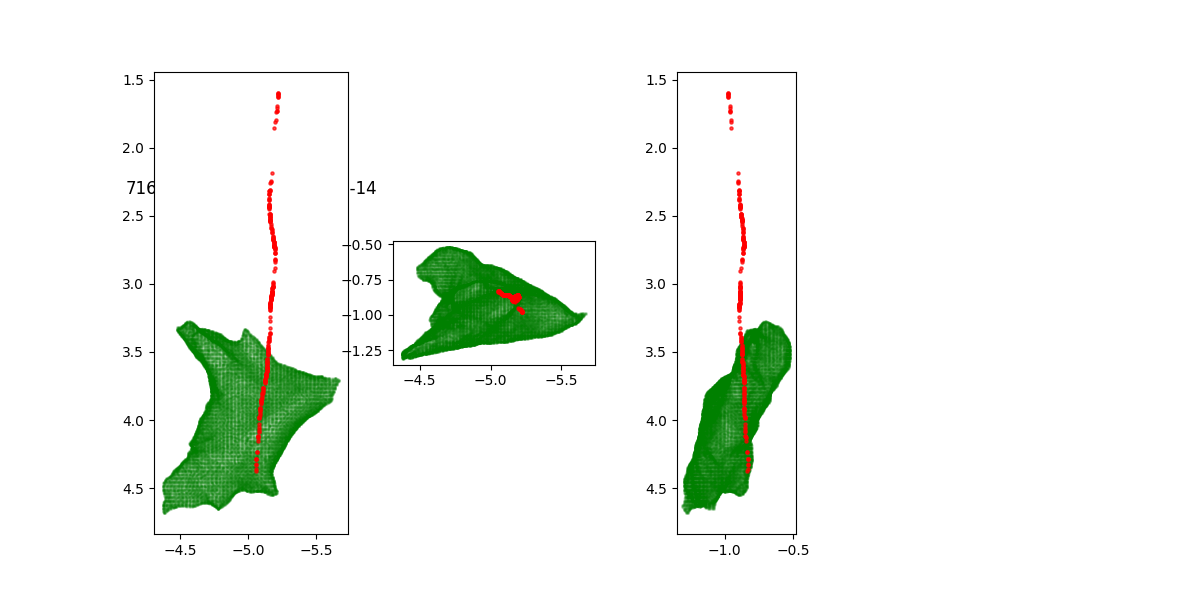

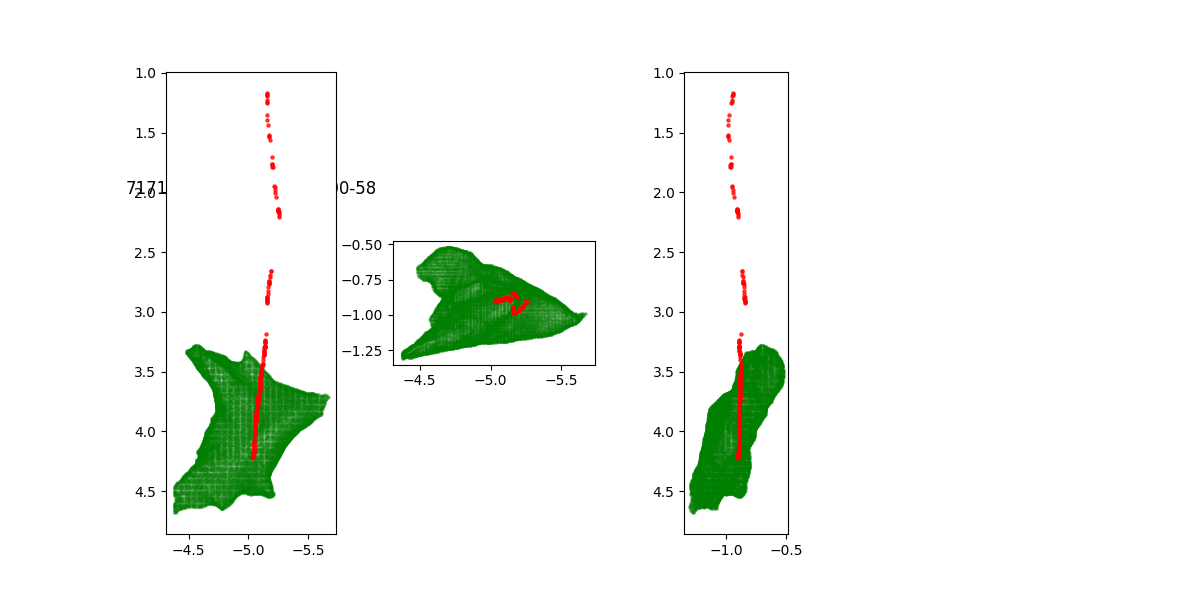

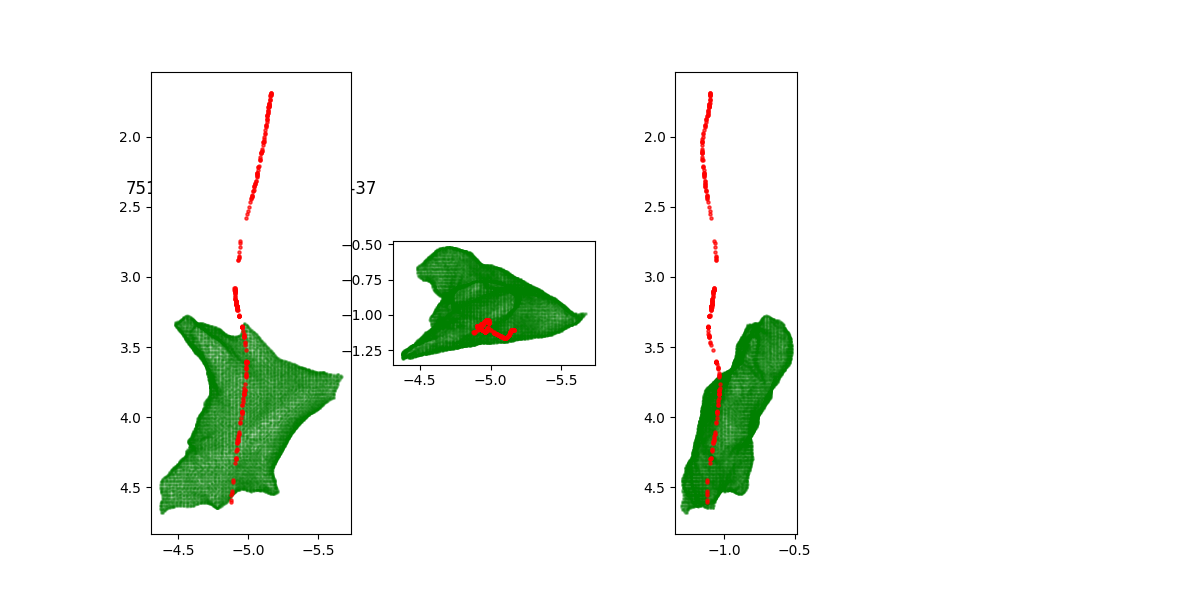

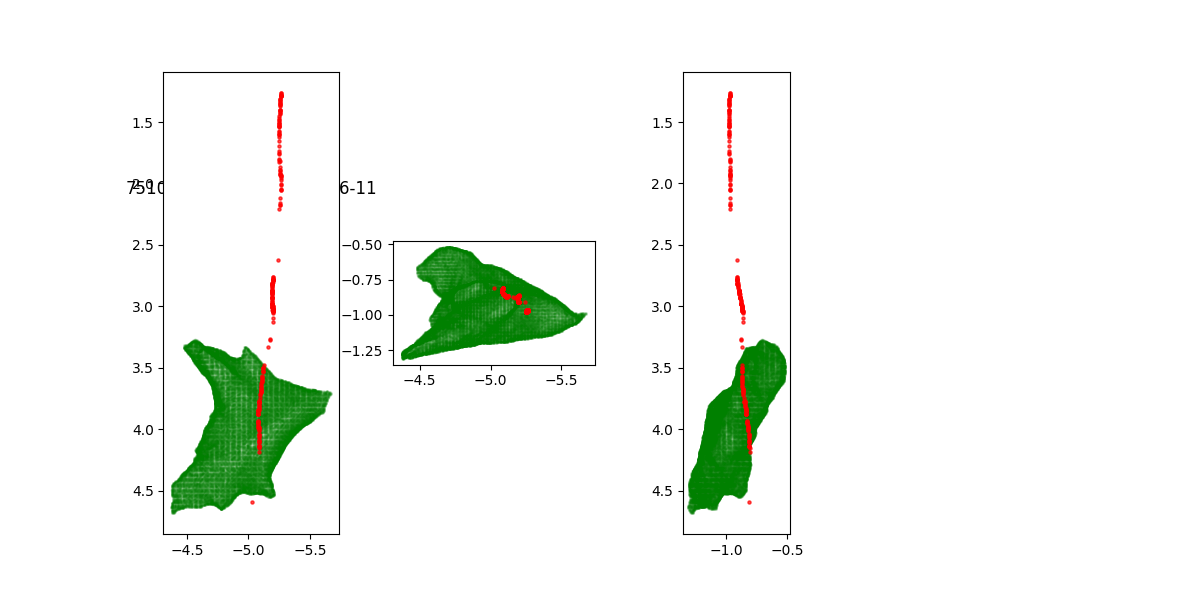

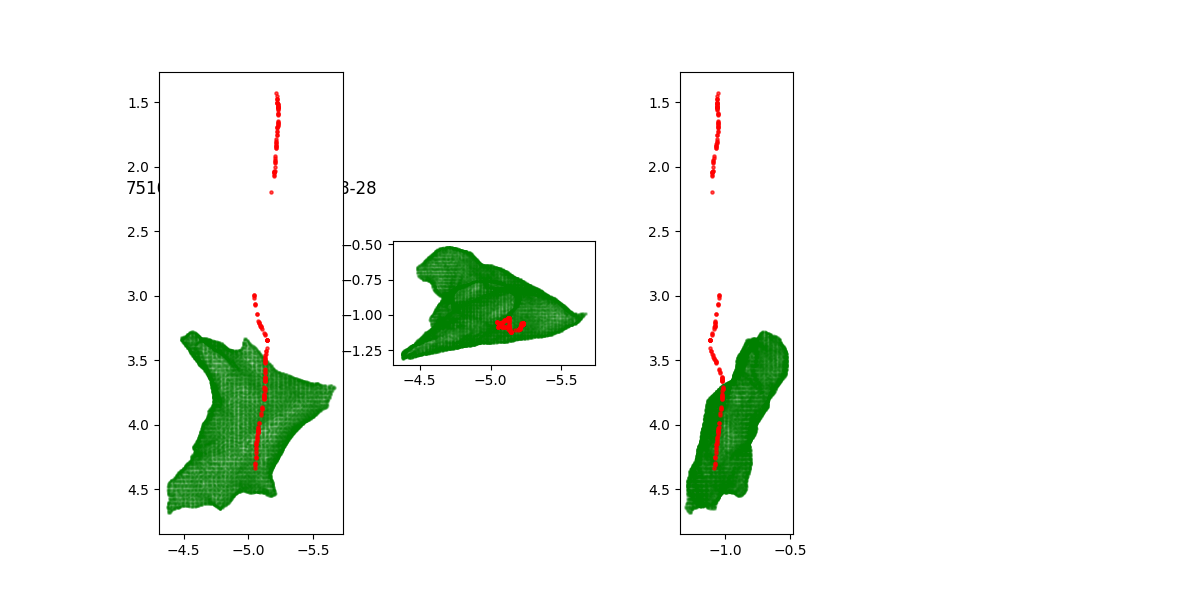

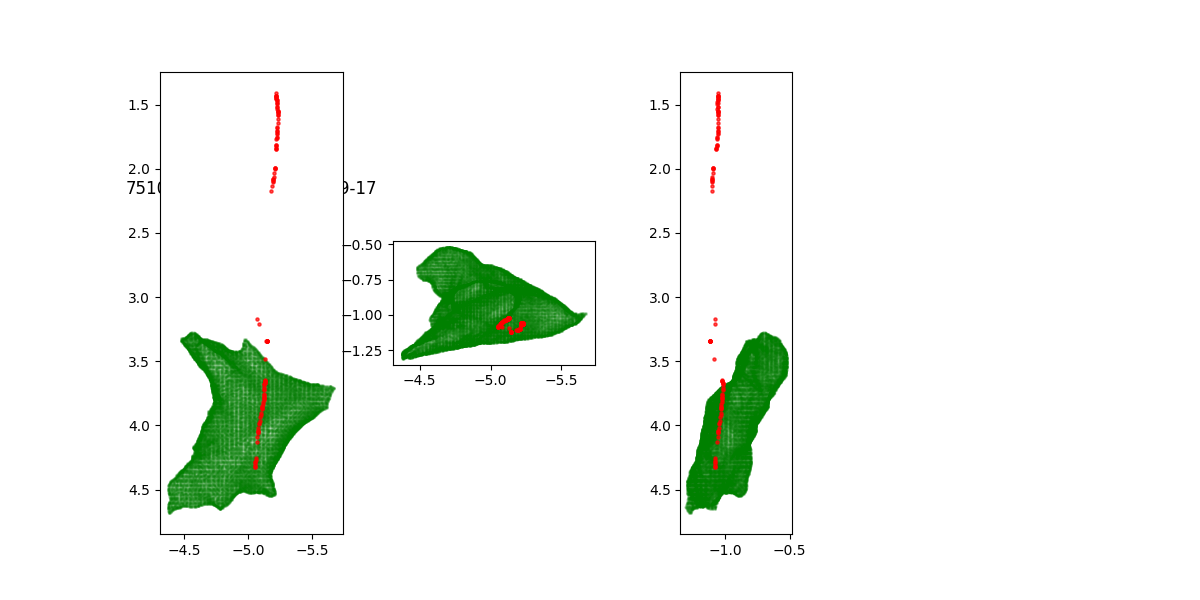

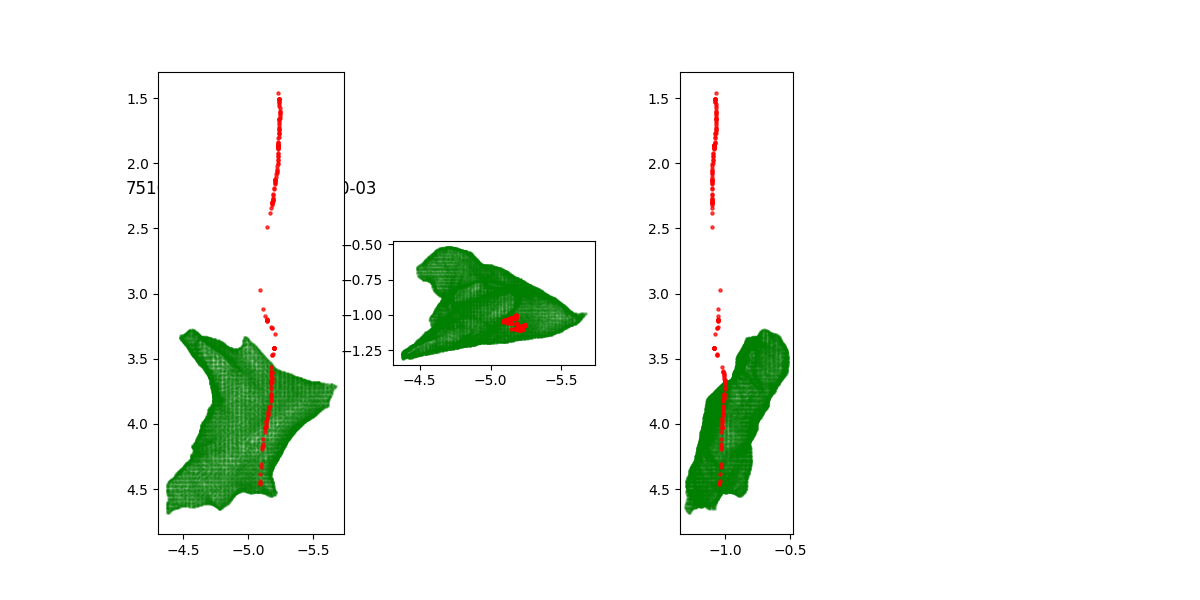

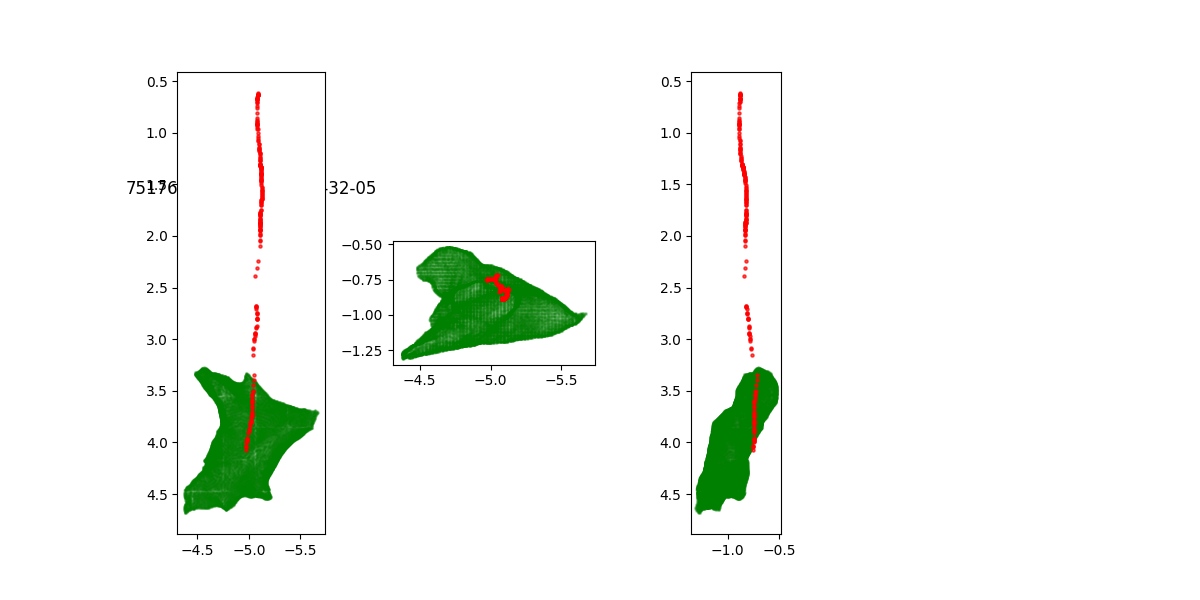

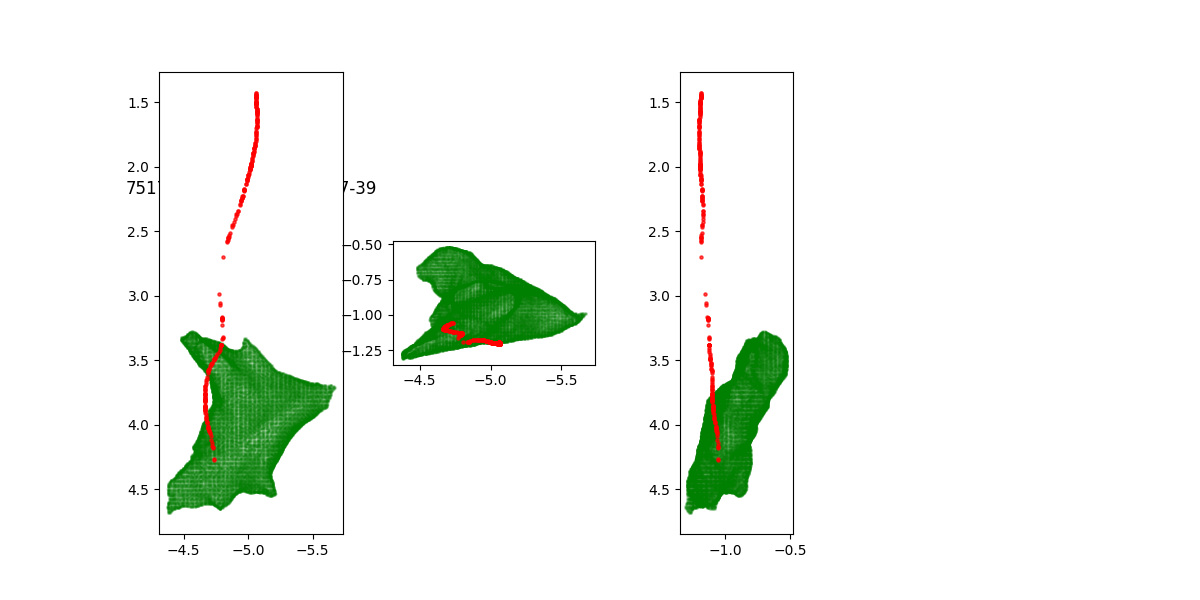

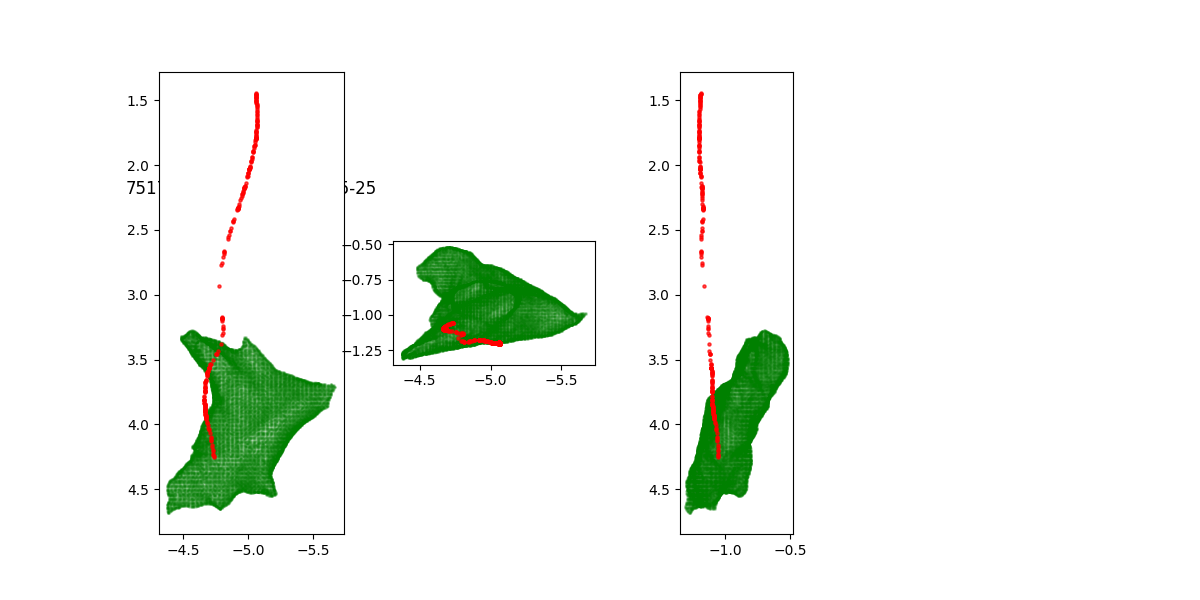

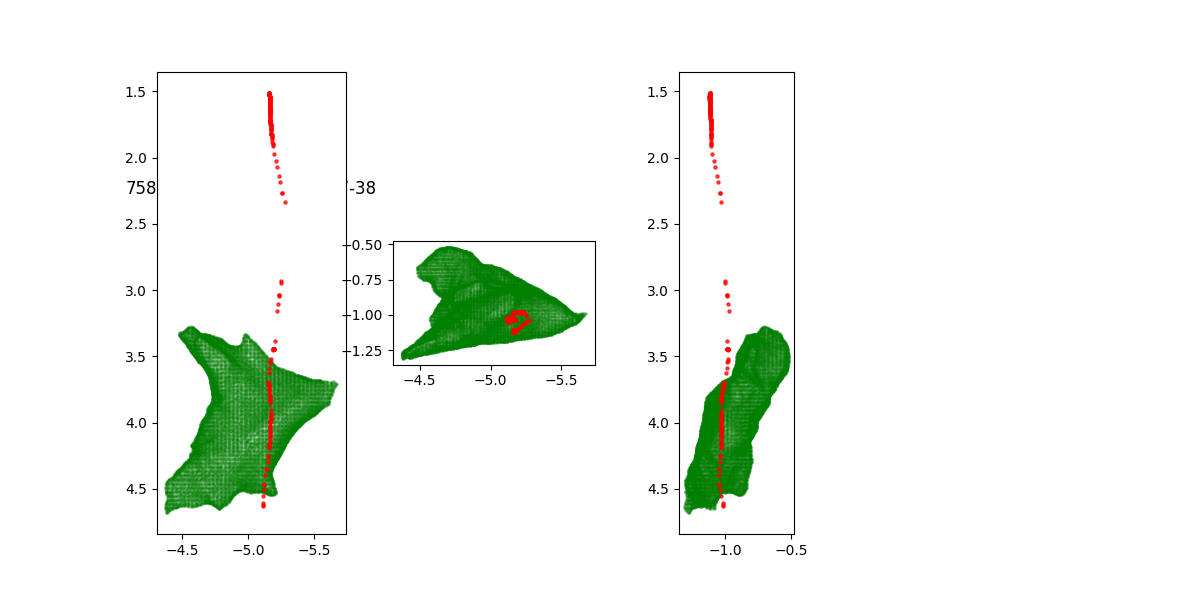

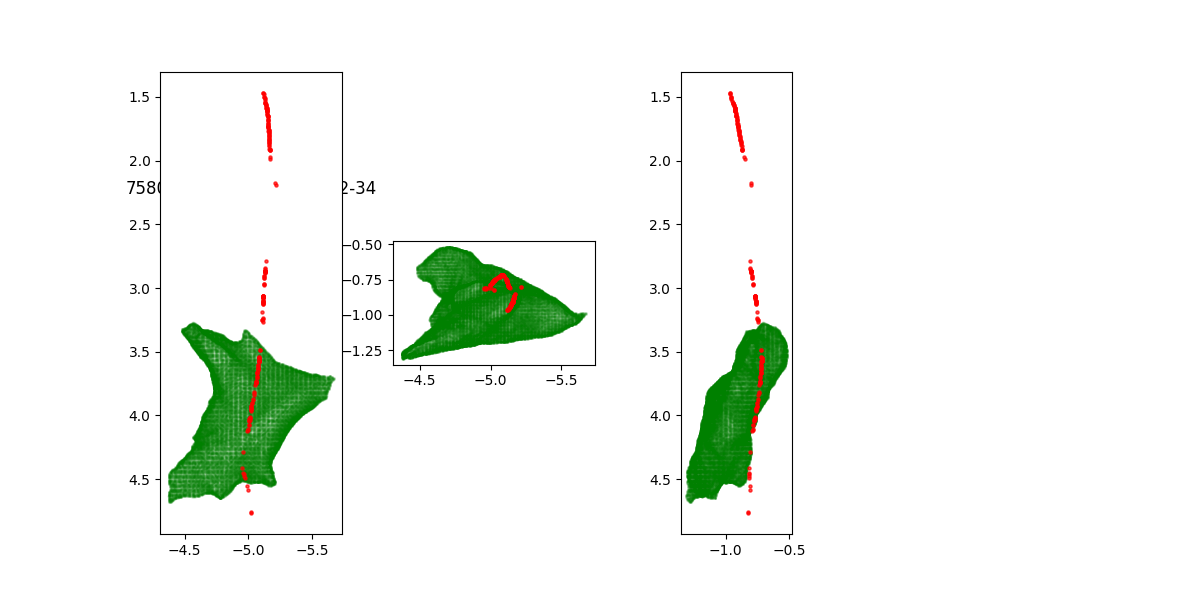

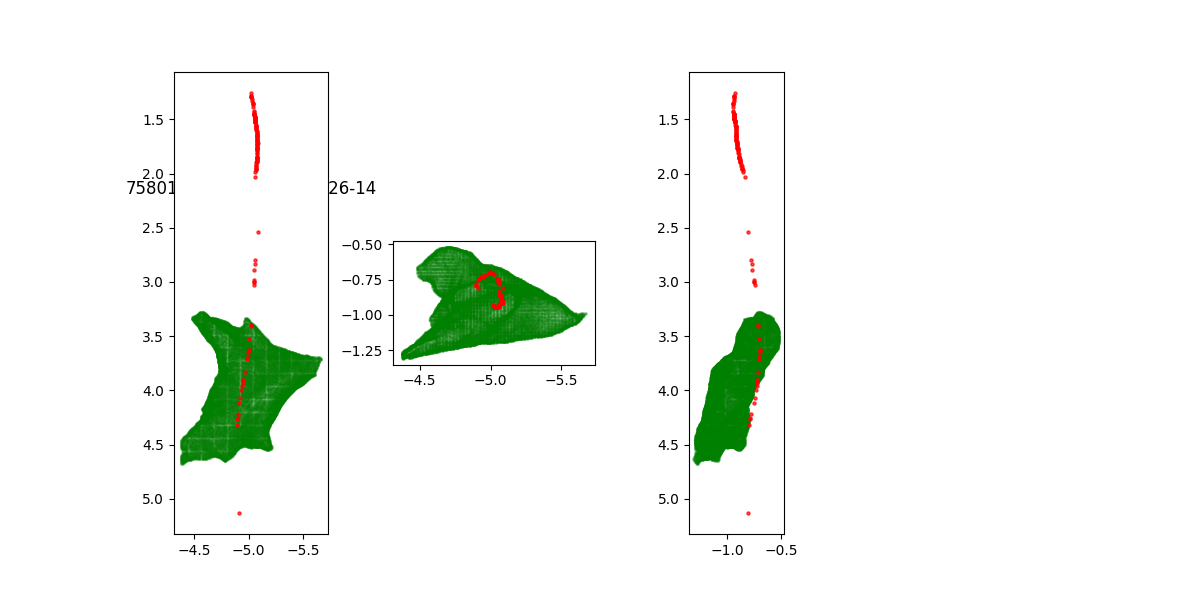

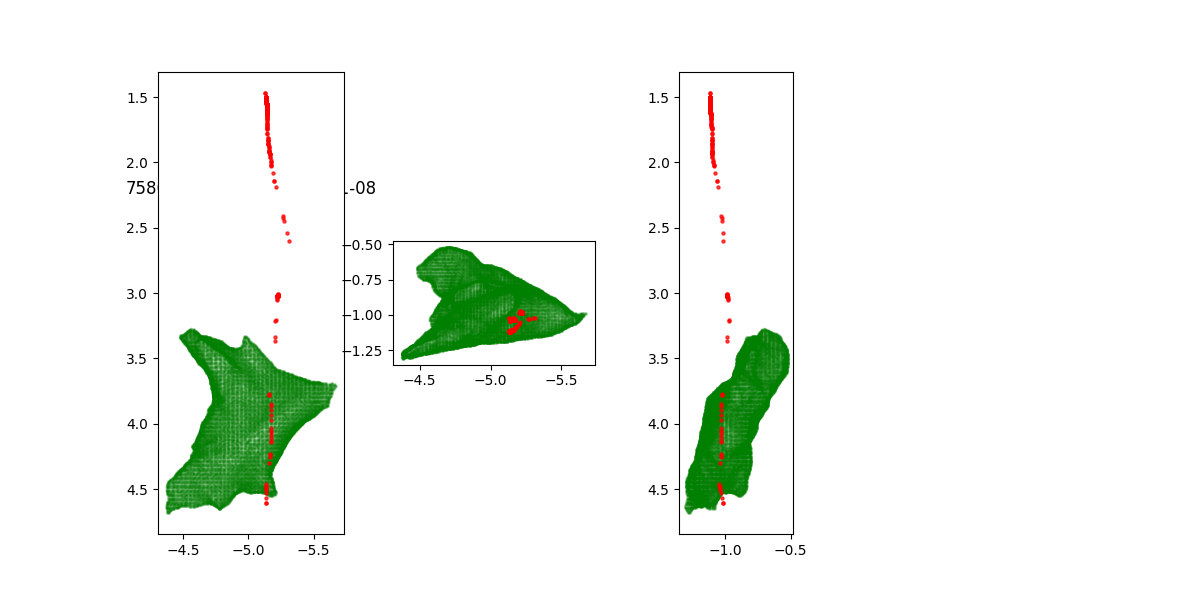

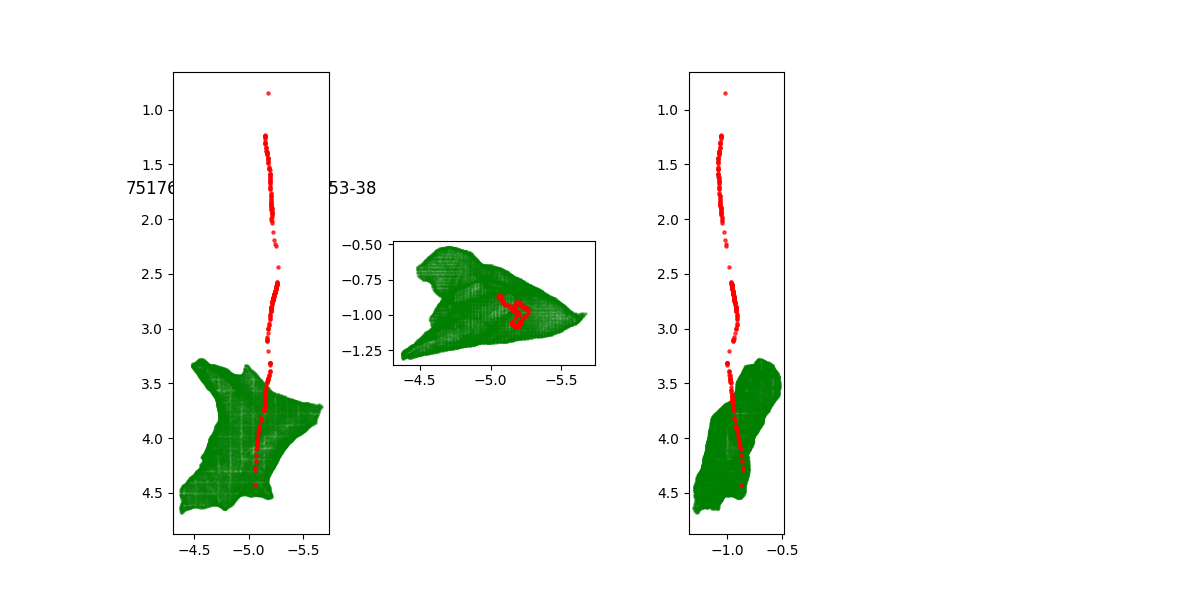

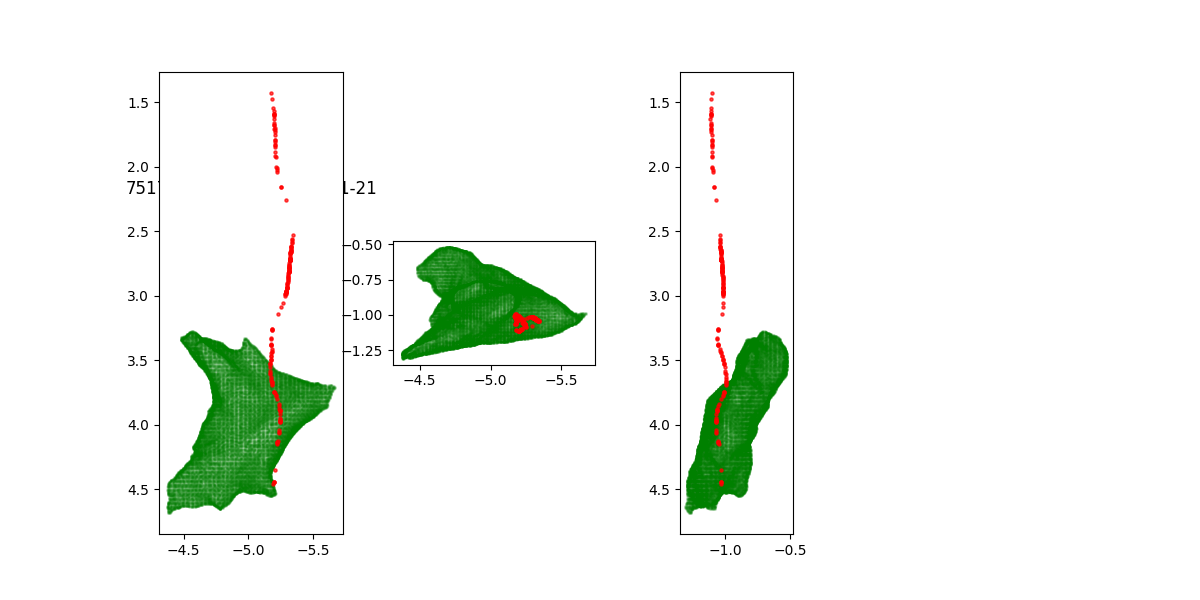

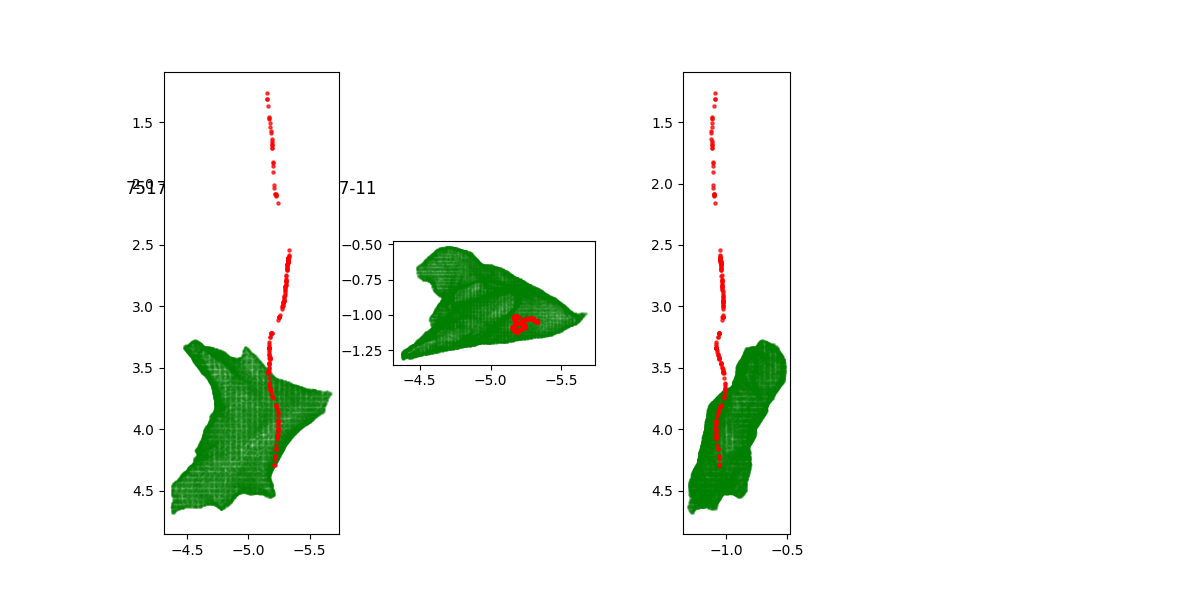

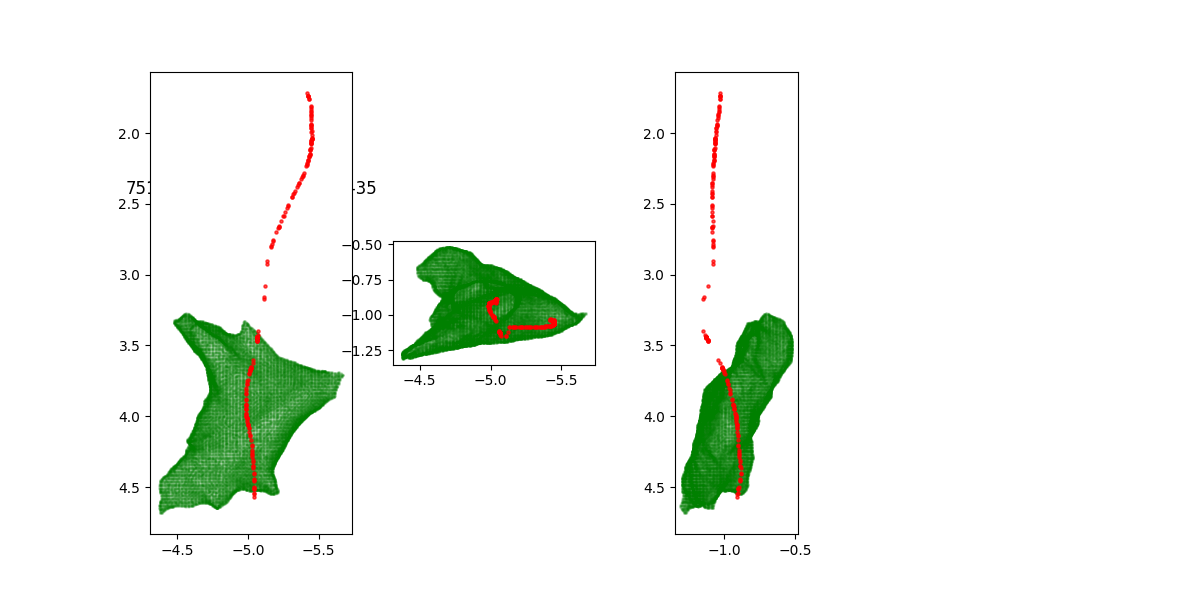

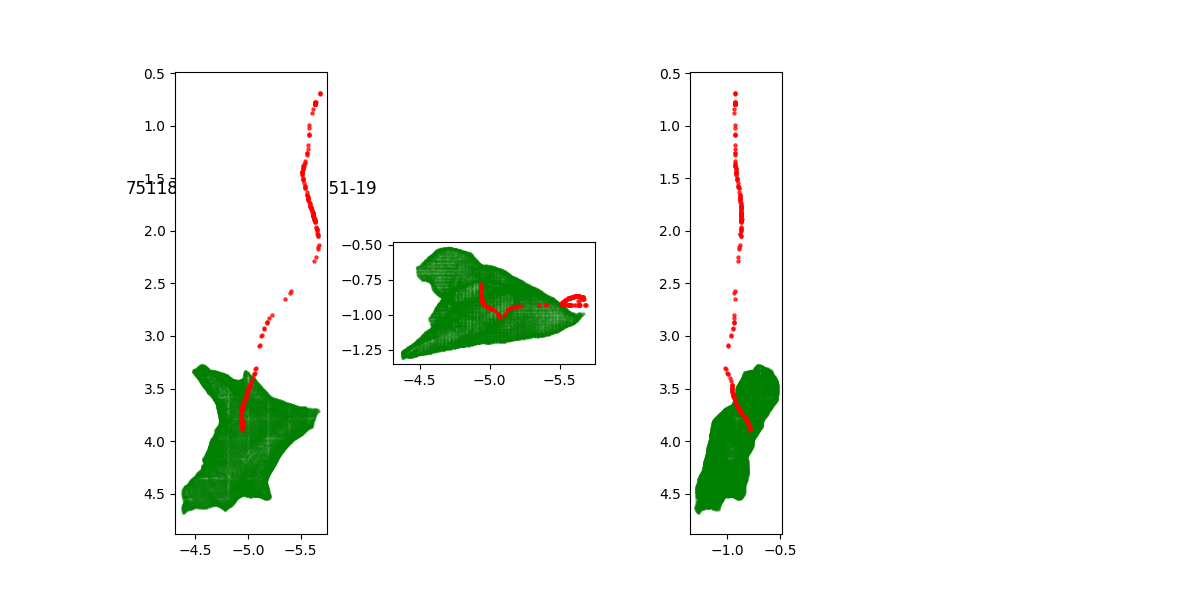

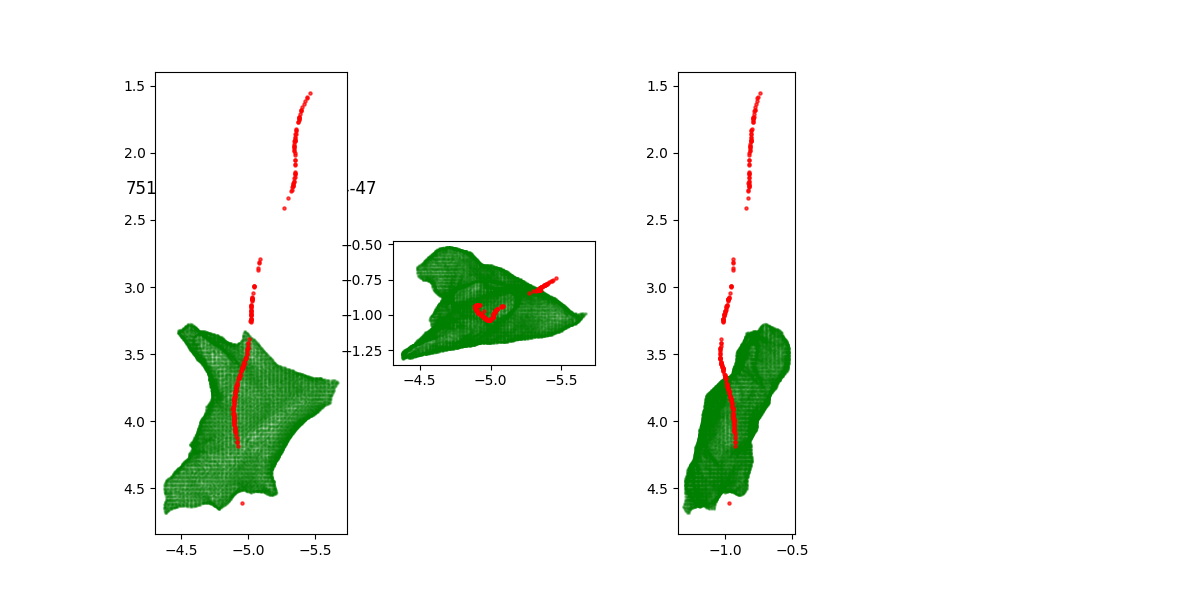

In [29]:
for i, row in ccf_df.iterrows():
    ccfs = row['unit_ccf_pts']
    if ccfs is not None:
        print(row['session_id'])
        ccfs = np.array(ccfs)
        ccfs = ccf_pts_convert_to_mm(ccfs, bregma_points, voxel_size)
        if np.mean(ccfs[:, ml]) > 0:
            ccfs[:, ml] = ccfs[:, ml] * -1  # flip ML-axis
        print(ccfs.shape)
        fig = plt.figure(figsize=(12, 6))
        ax = fig.add_subplot(141, projection='3d')
        ax.scatter(ccfs[:, ml], ccfs[:, ap], ccfs[:, dv], c='r', marker='o')
        ax.scatter(mesh_vertices_mm[:, ml], mesh_vertices_mm[:, ap], mesh_vertices_mm[:, dv],
                    color=color, s=1, alpha=0.1, edgecolors='none')
        ax.set_aspect('equal', adjustable='box')

        ax.set_aspect('equal', adjustable='box')
        ax.set_xlabel('ml')
        ax.set_ylabel('ap')
        ax.set_zlabel('dv')
        ax.invert_zaxis()
        ax.invert_yaxis()
        ax.set_title(row['session_id'])

        for i, (x, y) in enumerate(plane_axes):
            ax = fig.add_subplot(1, 4, i + 1)
            ax.scatter(mesh_vertices_mm[:, x], mesh_vertices_mm[:, y],
                        color=color, s=1, alpha=0.1, label=mesh_name)
            ax.set_aspect('equal', adjustable='box')
            ax.scatter(ccfs[:, x], ccfs[:, y], c='r', marker='o', s=5, alpha=0.7)
            if y == 1:
                ax.invert_yaxis()
            if x == 0:
                ax.invert_xaxis()

In [3]:
for ind, row in ccf_df.iterrows():
    session = row['session']
    aniID, date_obj, raw_id = parseSessionID(session)
    if aniID not in skipping_ani_ids:
        # check if element is saved as a string
        units = ast.literal_eval(row['opto_units']) if isinstance(row['opto_units'], str) else row['opto_units']
        ccfs = ast.literal_eval(row['opto_unit_ccf_pts']) if isinstance(row['opto_unit_ccf_pts'], str) else row['opto_unit_ccf_pts']
        if ccfs is not None:
            for unit, ccf in zip(units, ccfs):
                if len(combined_unit_tbl[(combined_unit_tbl['unit'] == unit) & (combined_unit_tbl['session'] == session)]) > 0:
                    combined_unit_tbl.loc[(combined_unit_tbl['unit'] == unit) & (combined_unit_tbl['session'] == session), 'x_ccf'] = ccf[0]
                    combined_unit_tbl.loc[(combined_unit_tbl['unit'] == unit) & (combined_unit_tbl['session'] == session), 'y_ccf'] = ccf[1]
                    combined_unit_tbl.loc[(combined_unit_tbl['unit'] == unit) & (combined_unit_tbl['session'] == session), 'z_ccf'] = ccf[2]
                else:
                    print(f"Unit {unit} in session {session} not found in combined_unit_tbl. Skipping update.")

In [4]:
# update the existing pickle file with the new CCF coordinates
with open(combined_pickle_path, 'wb') as f:
    pickle.dump(combined_unit_tbl, f)

In [6]:
combined_unit_tbl.columns

Index(['session', 'unit', 'qc_pass', 'opto_tagged', 'opto_tagging_pre',
       'opto_tagging_post', 'anti', 'in_df', 'trial_count', 'p_max',
       'lat_max_p', 'isi_violations', 'snr', 'eu', 'corr', 'amp', 'peak', 'wf',
       'wf_aligned', 'wf_2d', 'probe', 'y_loc', 'rec_side', 'top', 'bottom',
       'x_ccf', 'y_ccf', 'z_ccf'],
      dtype='object')